# 機器學習應用_第一組-2 California Housing Prices
https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

該資料涉及在加州某個地區發現的房屋以及基於 1990 年人口普查數據，這是一個易於理解的入門資料集，用於教導人們機器學習的基礎知識。

# Feature

 1-經度：衡量房屋向西有多遠的量度； 數值越高越往西 (數字)

2 - 緯度：衡量房屋向北有多遠的指標； 數值越高越北 (數字)

3 – housing_median_age：街區內房屋的中位數年齡； 數字較低的是較新的建築 (數字)

4 - totalRooms：一個街區內的房間總數 (數字)

5 - totalBedrooms：一個街區內的臥室總數 (數字)

6 - population：居住在一個街區內的總人數 (數字)

7 - households：一個街區的家庭總數，即居住在一個家庭
單位內的一群人 (數字)

8 - median_income：一棟房屋內的家庭收入中位數（數字，以萬美元為單位）

10 - ocean_proximity：房子相對海洋的位置（類別：「<1H 海洋」、「內陸」、「靠近海洋」、「靠近海灣」、「島嶼」）

# Label
9 - median_house_value	：一個街區內家庭的房屋價值中位數（數字，以萬美元為單位）

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/大三/下學期/機器學習應用/Datasets/california_housing_train")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering import
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import OrdinalEncoder ,MinMaxScaler ,StandardScaler

# Model import
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
import xgboost as xgb
from xgboost import XGBClassifier ,XGBRegressor
from sklearn.neighbors import KNeighborsClassifier ,KNeighborsRegressor
from sklearn.linear_model import LinearRegression ,RANSACRegressor ,Ridge ,Lasso ,ElasticNet

# Evaluate import
from sklearn import metrics
from sklearn.metrics import accuracy_score ,roc_auc_score ,roc_curve ,classification_report ,confusion_matrix
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error ,explained_variance_score

# sns.set(style="whitegrid")
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)
plt.rcParams['axes.unicode_minus'] = False # 正常顯示負號

# EDA
讀取資料，做資料探索

In [16]:
df = pd.read_csv("./california_housing_train.csv")
# df.rename(columns={'housing_median_age' :'housing_age'}, inplace=True)
# df.rename(columns={'median_income' :'income'}, inplace=True)
# df.rename(columns={'median_house_value' :'house_value'}, inplace=True)
# 調整 median_house_value 欄位，以萬美元為單位
df['median_house_value'] /= 10000

df # 20640 rows × 10 columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.33,45.26,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.30,35.85,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.26,35.21,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.64,34.13,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.85,34.22,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.56,7.81,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.56,7.71,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.70,9.23,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.87,8.47,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Numerical statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,20.69
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,11.54
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,1.50
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,11.96
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,17.97
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,26.47
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,50.00


In [6]:
# Object statistics
df.describe(include=['object'])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [7]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [17]:
# for column in df.columns:
#     print(f"Unique values in {column}: {df[column].unique()}")

categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()}") # 列出唯一值

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


# Plot

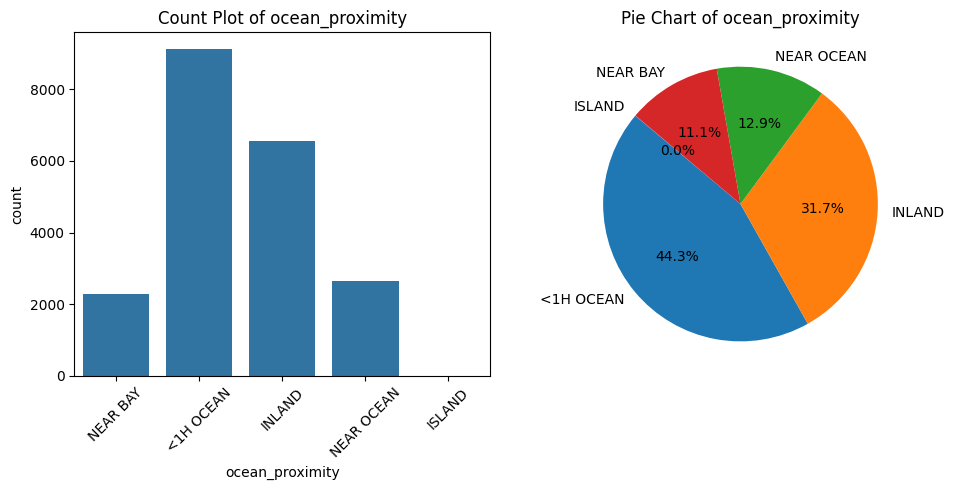

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [9]:
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    profile_counts = df[col].value_counts()
    plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {col}')
    plt.tight_layout()
    plt.show()
    print(df[col].value_counts())

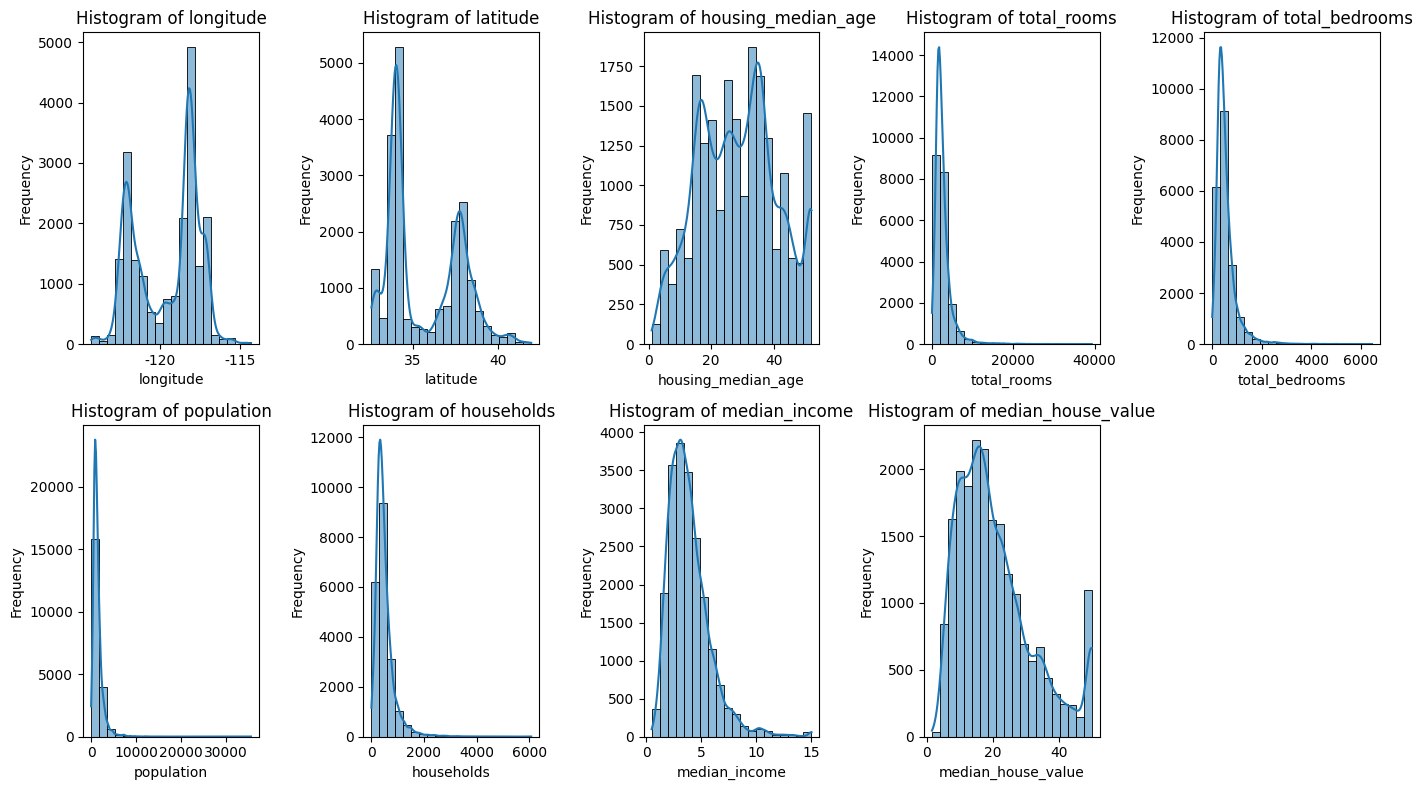

In [10]:
numerical_columns = df.select_dtypes(include='number').columns

plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 5, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Missing Value

<Axes: >

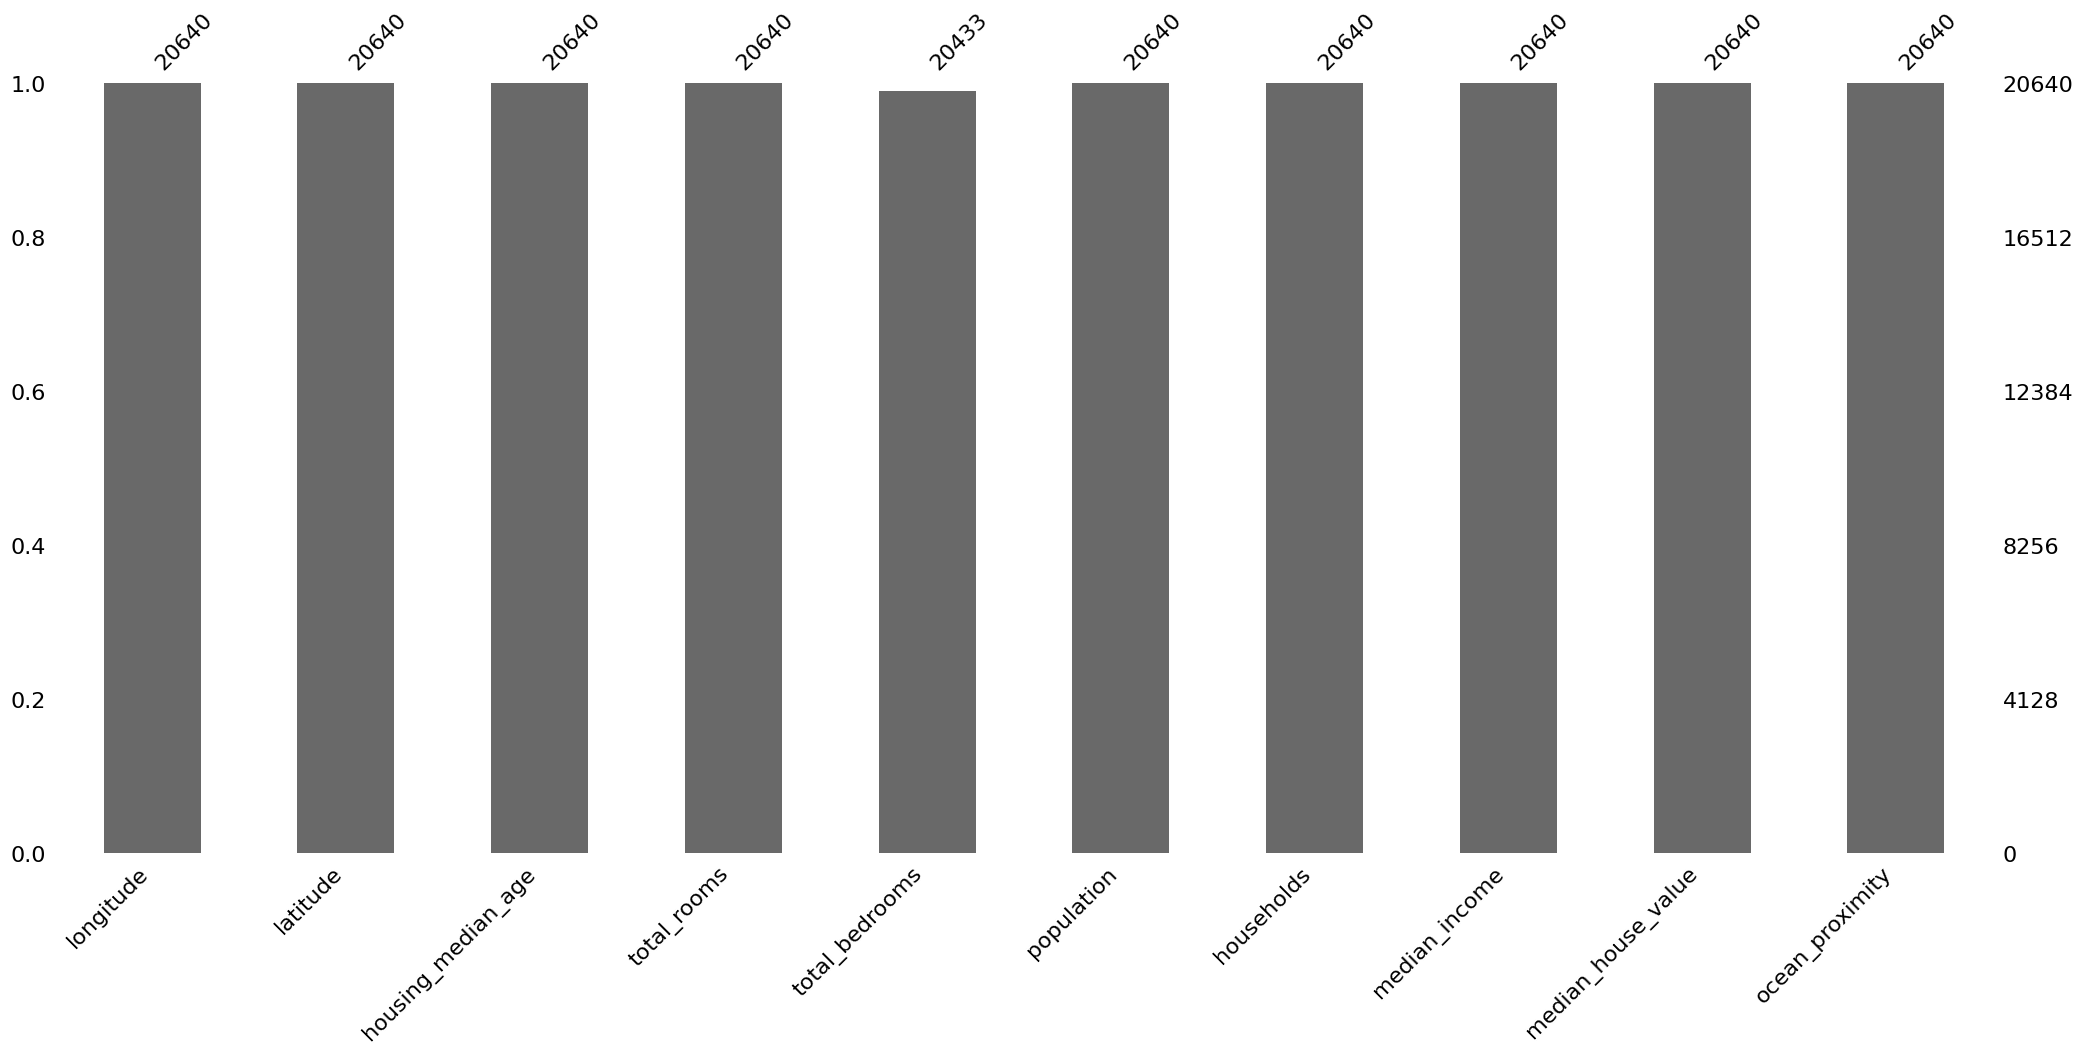

In [11]:
import missingno as msno

msno.bar(df)

<Axes: >

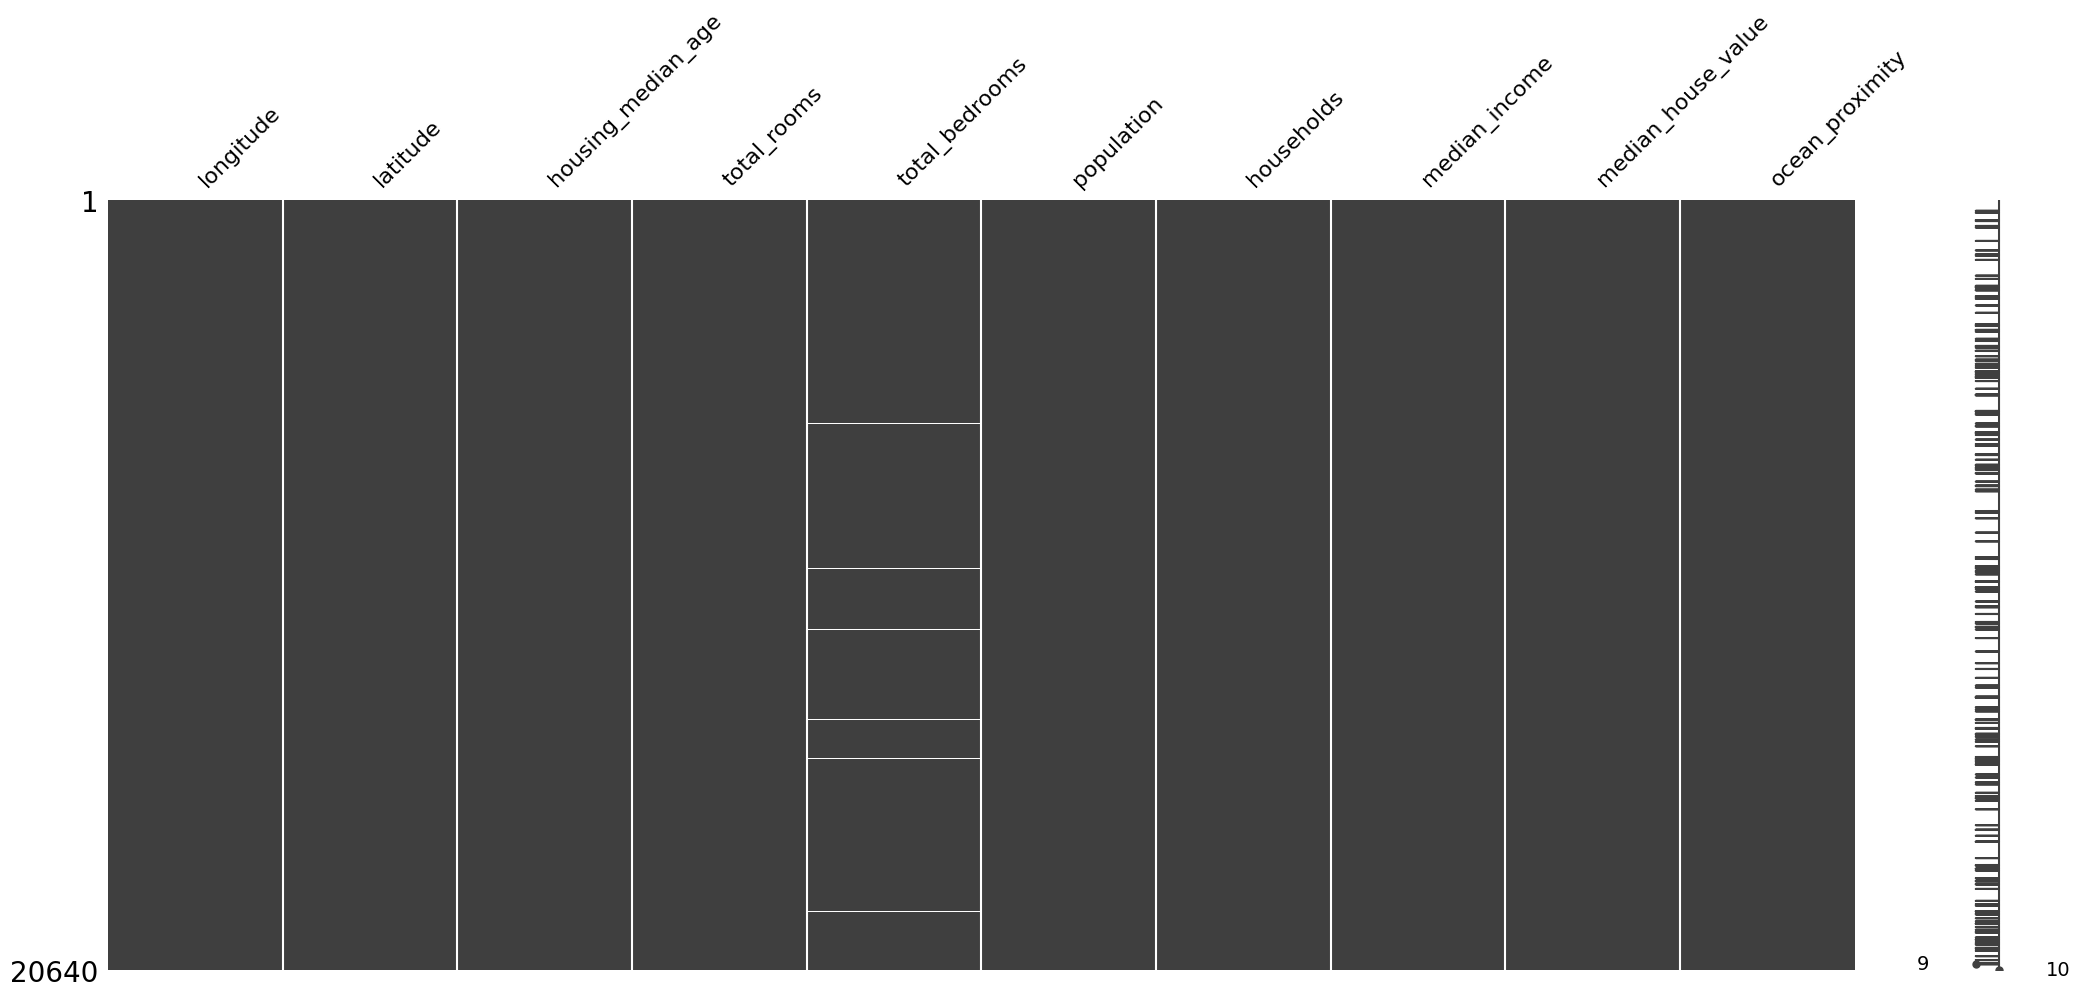

In [12]:
msno.matrix(df)

total_bedrooms有207筆的缺失數值，其餘欄位都沒有缺失值

In [18]:
# 缺失值填補
mean_total_bedrooms = df['total_bedrooms'].mean()

# 平均值填入total_bedrooms的空值
df['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)

In [19]:
# Scatter plot matrix 散點圖矩陣
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

# Feature Engineering
刪除、替換特定欄位/類別，將特徵和標籤做轉換

In [20]:
# ISLAND 資料筆數僅5，過少，因此決定刪除
df = df[df['ocean_proximity'] != 'ISLAND']

df # 20640 rows × 10 columns ---> 20635 rows × 10 columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.33,45.26,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.30,35.85,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.26,35.21,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.64,34.13,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.85,34.22,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.56,7.81,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.56,7.71,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.70,9.23,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.87,8.47,INLAND


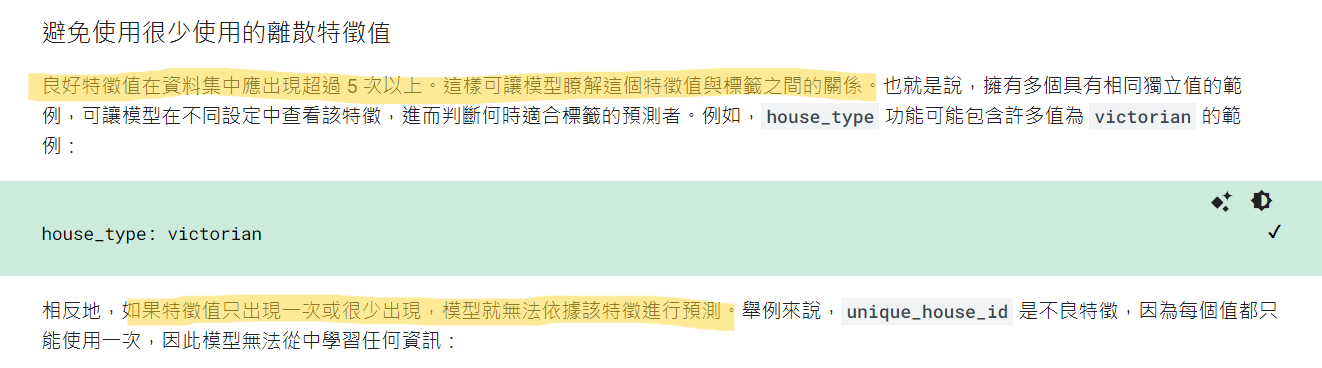

In [21]:
categorical_columns = df.select_dtypes(include='object').columns
or_encoder = OrdinalEncoder()
df_copy = df.copy()
or_encoder = OrdinalEncoder()

for col in categorical_columns:
  df_copy[categorical_columns + '_encoded'] = or_encoder.fit_transform(df[categorical_columns])
  original_values = df[col].unique()
  encoded_values = df_copy[col + '_encoded'].unique()
  print(f"Original values for column '{col}': {original_values}")
  print(f"Encoded values for column '{col}_encoded': {encoded_values}")
  print()

Original values for column 'ocean_proximity': ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN']
Encoded values for column 'ocean_proximity_encoded': [2. 0. 1. 3.]



In [22]:
# 類別特徵欄位做OrdinalEncoder
categorical_columns = df.select_dtypes(include=['object','bool']).columns
or_encoder = OrdinalEncoder()
df_encoded = df.copy()
df_encoded[categorical_columns] = or_encoder.fit_transform(df[categorical_columns])

In [23]:
df_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.33,45.26,2.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.30,35.85,2.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.26,35.21,2.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.64,34.13,2.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.85,34.22,2.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.56,7.81,1.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.56,7.71,1.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.70,9.23,1.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.87,8.47,1.0


# Hetmap
熱力圖,顯示欄位間的相關性

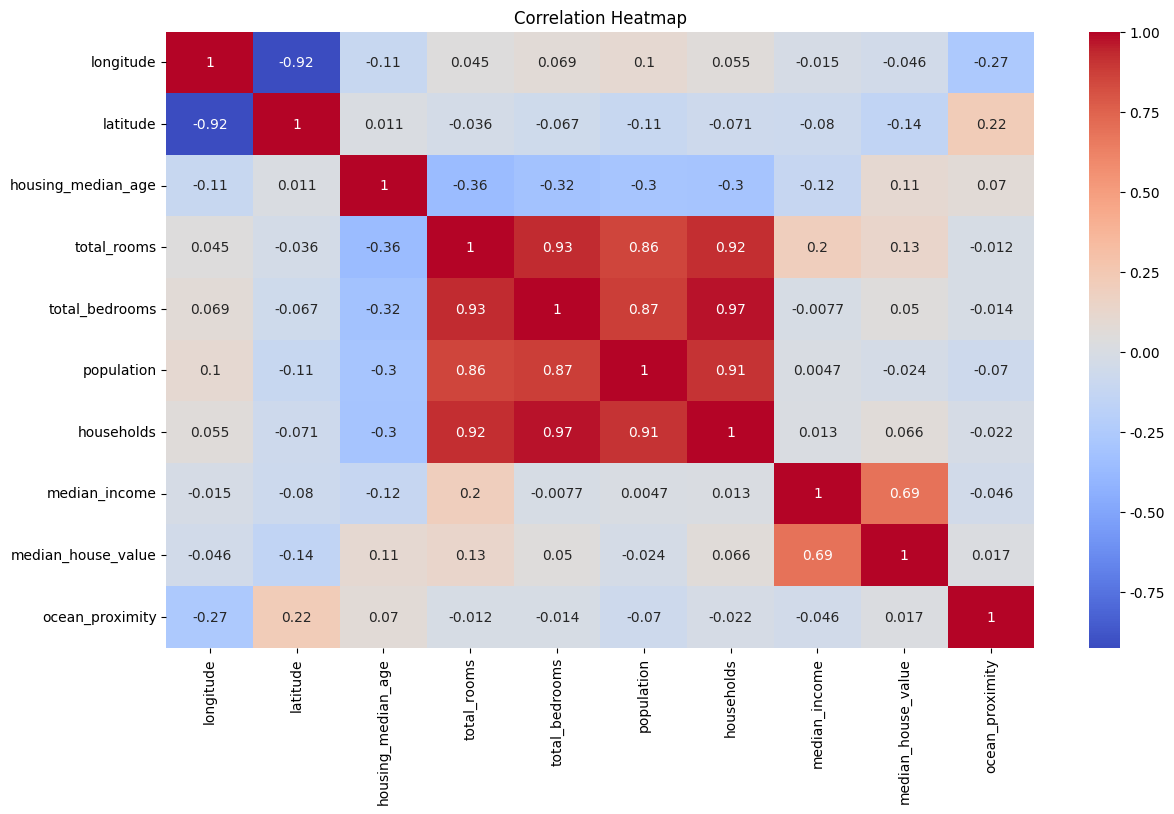

In [24]:
corr = df_encoded.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.00,-0.92,-0.11,0.04,6.93e-02,9.99e-02,0.06,-1.51e-02,-0.05,-0.27
latitude,-0.92,1.00,0.01,-0.04,-6.67e-02,-1.09e-01,-0.07,-8.00e-02,-0.14,0.22
housing_median_age,-0.11,0.01,1.00,-0.36,-3.19e-01,-2.96e-01,-0.30,-1.19e-01,0.11,0.07
total_rooms,0.04,-0.04,-0.36,1.00,9.27e-01,8.57e-01,0.92,1.98e-01,0.13,-0.01
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00e+00,8.74e-01,0.97,-7.73e-03,0.05,-0.01
population,0.10,-0.11,-0.30,0.86,8.74e-01,1.00e+00,0.91,4.74e-03,-0.02,-0.07
households,0.06,-0.07,-0.30,0.92,9.75e-01,9.07e-01,1.00,1.30e-02,0.07,-0.02
median_income,-0.02,-0.08,-0.12,0.20,-7.73e-03,4.74e-03,0.01,1.00e+00,0.69,-0.05
median_house_value,-0.05,-0.14,0.11,0.13,4.96e-02,-2.44e-02,0.07,6.89e-01,1.00,0.02
ocean_proximity,-0.27,0.22,0.07,-0.01,-1.44e-02,-7.02e-02,-0.02,-4.65e-02,0.02,1.00


In [26]:
df_encoded.to_csv('california_housing_handled.csv', index=False)

# Train Test Split
資料分割，將資料集拆分為訓練集和測試集，針對訓練集的數值特徵做標準化然後做異常值處理

In [ ]:
df = pd.read_csv("./california_housing_handled.csv")

df # 20635 rows × 10 columns

In [28]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (14444, 9)
X_test: (6191, 9)
y_train: (14444,)
y_test: (6191,)


In [29]:
numeric_cols = X_train.select_dtypes(include=['int','float']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols]) # 在測試集上做相同的轉換

In [ ]:
X_train # 14444 rows × 9 columns

In [ ]:
X_train[numeric_cols].describe()

In [ ]:
X_test # 6191 rows × 9 columns

In [ ]:
X_test[numeric_cols].describe()

In [34]:
def remove_outliers(df, cols, threshold=3):
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

X_train_no_outliers = remove_outliers(pd.DataFrame(X_train, columns=numeric_cols), numeric_cols)
y_train_no_outliers = y_train[X_train_no_outliers.index]

In [35]:
X_train_no_outliers # 14444 rows × 9 columns ---> 13358 rows × 9 columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10051,-0.71,1.69,-1.16,-8.32e-01,-9.17e-01,-0.99,-0.94,-0.40,0.08
6541,0.77,-0.75,0.36,-5.89e-01,-8.87e-03,-0.29,-0.63,0.22,-0.90
8607,0.61,-0.84,-0.04,1.35e-02,9.24e-02,-0.17,0.07,0.13,-0.90
8237,0.70,-0.88,1.87,-4.93e-01,1.75e-01,-0.65,0.02,-1.30,2.02
13198,0.95,-0.75,-0.28,-3.59e-01,-1.85e-01,-0.32,-0.33,-0.70,0.08
...,...,...,...,...,...,...,...,...,...
11284,0.82,-0.87,-0.36,6.87e-01,5.69e-01,0.41,0.59,0.48,-0.90
11964,1.07,-0.78,-0.60,-9.53e-03,-2.83e-01,-0.05,-0.25,0.20,0.08
5390,0.60,-0.76,0.59,-2.50e-01,6.42e-02,0.28,0.06,-0.50,-0.90
860,-1.18,0.90,-1.08,4.15e-01,1.30e-01,0.30,0.14,0.97,-0.90


# Model Test

In [ ]:
# 做線性Regression

Training Set Performance:
Mean Squared Error: 7.641704727734142
R²: 0.9424694000496803


Testing Set Performance:
Mean Squared Error: 24.057882768047595
R²: 0.8201114766184071


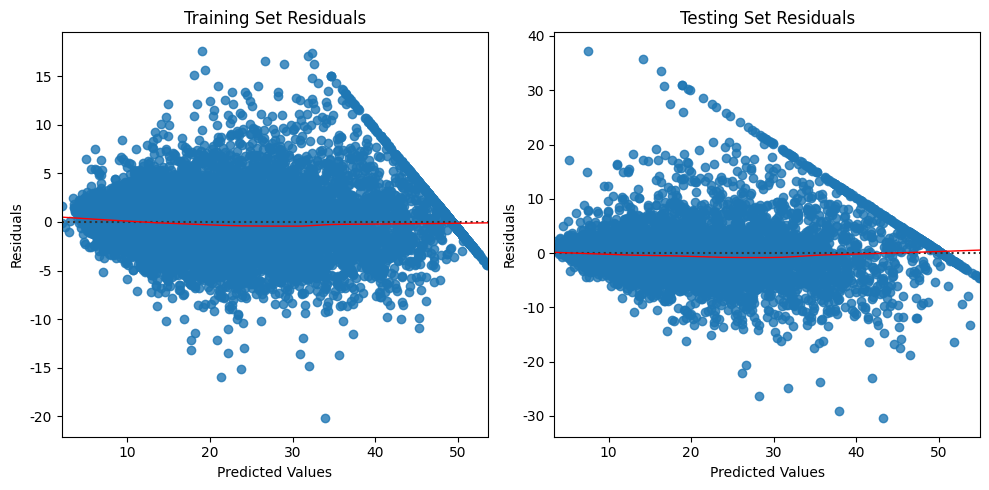

In [36]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
def evaluate_model_performance(model, X_train, X_test, y_train, y_test):
  # 訓練集上的模型評分
  y_train_pred = model.predict(X_train)
  train_mse = mean_squared_error(y_train, y_train_pred)
  train_r2 = r2_score(y_train, y_train_pred)
  print("Training Set Performance:")
  print(f"Mean Squared Error: {train_mse}")
  print(f"R²: {train_r2}")
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  sns.residplot(x=y_train_pred, y=y_train - y_train_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
  plt.xlabel("Predicted Values")
  plt.ylabel("Residuals")
  plt.title("Training Set Residuals")
  print("\n")

  # 測試集上的模型評分
  y_test_pred = model.predict(X_test)
  test_mse = mean_squared_error(y_test, y_test_pred)
  test_r2 = r2_score(y_test, y_test_pred)
  print("Testing Set Performance:")
  print(f"Mean Squared Error: {test_mse}")
  print(f"R²: {test_r2}")
  plt.subplot(1, 2, 2)
  sns.residplot(x=y_test_pred, y=y_test - y_test_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
  plt.xlabel("Predicted Values")
  plt.ylabel("Residuals")
  plt.title("Testing Set Residuals")
  plt.tight_layout()
  plt.show()
evaluate_model_performance(xgb_model, X_train, X_test, y_train, y_test)

Training Set Performance:
Mean Squared Error: 7.179949418114641
R²: 0.9415903194342897


Testing Set Performance:
Mean Squared Error: 23.67362250917457
R²: 0.8229847141027423


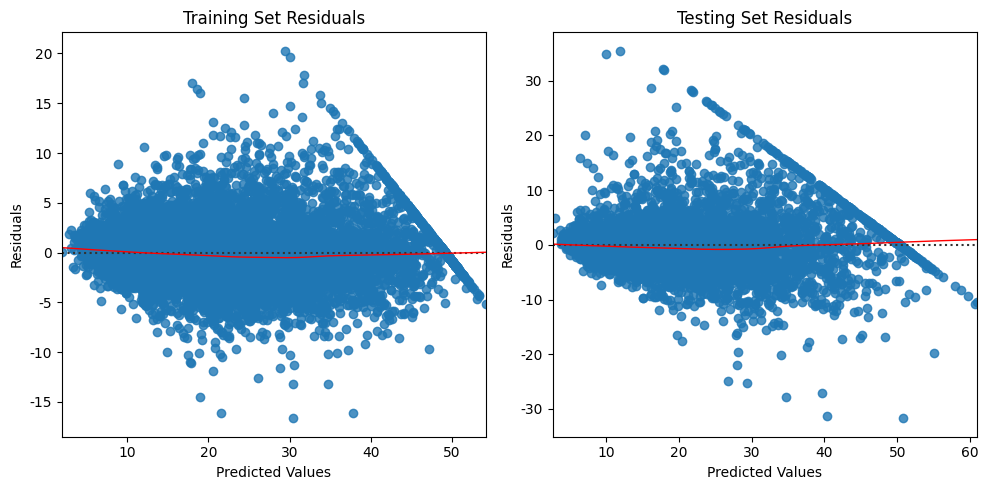

In [37]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_no_outliers, y_train_no_outliers)
def evaluate_model_performance(model, X_train, X_test, y_train, y_test):
  # 訓練集上的模型評分
  y_train_pred = model.predict(X_train)
  train_mse = mean_squared_error(y_train, y_train_pred)
  train_r2 = r2_score(y_train, y_train_pred)
  print("Training Set Performance:")
  print(f"Mean Squared Error: {train_mse}")
  print(f"R²: {train_r2}")
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  sns.residplot(x=y_train_pred, y=y_train - y_train_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
  plt.xlabel("Predicted Values")
  plt.ylabel("Residuals")
  plt.title("Training Set Residuals")
  print("\n")

  # 測試集上的模型評分
  y_test_pred = model.predict(X_test)
  test_mse = mean_squared_error(y_test, y_test_pred)
  test_r2 = r2_score(y_test, y_test_pred)
  print("Testing Set Performance:")
  print(f"Mean Squared Error: {test_mse}")
  print(f"R²: {test_r2}")
  plt.subplot(1, 2, 2)
  sns.residplot(x=y_test_pred, y=y_test - y_test_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
  plt.xlabel("Predicted Values")
  plt.ylabel("Residuals")
  plt.title("Testing Set Residuals")
  plt.tight_layout()
  plt.show()
evaluate_model_performance(xgb_model, X_train_no_outliers, X_test, y_train_no_outliers, y_test)

**MSE(均方誤差)**

所有誤差的平方和取平均，越小代表越準確。

因為對誤差取平方，較容易看出離群的預測值，此評估方式較在乎誤差的大小。


**r2_score**

判定係數，是一種衡量回歸模型表現的指標，其值範圍為[0 ,1]越接近1表示模型對數據的解釋能力越強